In [1]:
from aiida_utils.load_data import load_data_slim

df = load_data_slim()

In [2]:
df.head()

,stru_label,stru_db,stru_id,stru_ase,temp,diff_mean,diff_std,diff_sem
0,Li24Al8N16,Crystallography Open Database,1537475,"(Atom('Li', [1.32153288454669, 1.1889521759917...",1000.0,1.473662e-09,6.356495e-09,0.0
1,Li12W2N8,Icsd,153620,"(Atom('Li', [-0.00479086273351767, 3.355033111...",1000.0,1.104319e-09,1.087360e-08,0.0
2,CsLi2I3,Icsd,245988,"(Atom('Cs', [2.2729018935732, 2.3626788474711,...",1000.0,5.288627e-05,1.527943e-05,0.000005
3,Li12Mo6O24,Crystallography Open Database,7024042,"(Atom('Li', [5.9857007794, -1.5287952538, 5.61...",1000.0,-3.460732e-08,5.281177e-10,0.0
4,Li4B4O8,Crystallography Open Database,2310701,"(Atom('Li', [-4.4695221250287, -3.443905316756...",1000.0,-4.483907e-08,1.086627e-07,0.0


In [3]:
top5 = df.query("temp == 500").sort_values("diff_mean", ascending=False).iloc[:5]["stru_label"].to_list()
top5

['Li4Ga4Br12', 'Li20Ge2P4S24', 'CsLi2I3', 'Li4Ga4I16', 'Li16Re24S44']

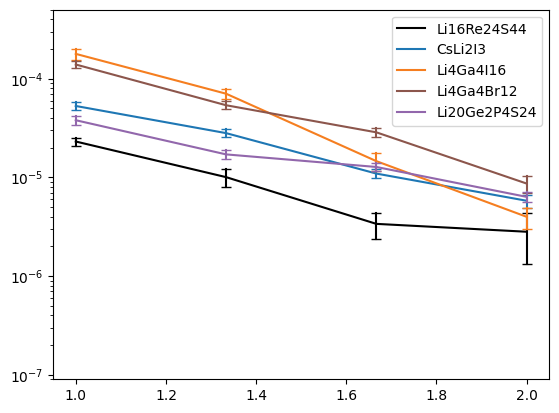

In [4]:
import matplotlib.pyplot as plt


# Colors to match those in Fig. 4 from paper
colors = dict(
    Li4Ga4I16="#f57e20",
    Li4Ga4Br12="#8c564c",
    CsLi2I3="#1e77b4",
    Li20Ge2P4S24="#9267ac",
    Li16Re24S44="black",  # except this one
)

for label, data in df.groupby(["stru_db", "stru_id"]):
    (stru_label,) = data["stru_label"].unique()
    if stru_label not in top5:
        continue
    data = data.sort_values("temp")
    if len(data) > 4:
        print("Multiple runs found for", ":".join(label))
        continue

    (line,) = plt.plot(1000.0 / data["temp"], data["diff_mean"], label=stru_label, color=colors[stru_label])
    for _, entry in data.iterrows():
        plt.plot(
            [1000.0 / entry["temp"]] * 2,
            [entry["diff_mean"] - entry["diff_sem"], entry["diff_mean"] + entry["diff_sem"]],
            color=line.get_color(),
            linewidth=line.get_linewidth(),
            marker="_",
            markersize=7,
        )

plt.ylim(0.9e-7, 5e-4)
plt.yscale("log")
plt.legend();